# Final Project for Data Science for Business at Duke
This is the final project for the class Data Science for Business (Decision 520Q.)

**Professor:** Dr. Natesh Pillai

**Team members:** Aaron Rodriguez, Davide Sgarbi, Flora Yang, Yin-Ta Pan

**Data Description:** The dataset comes from the University of California - Irvine, Machine Learning Repository. This is the [link](https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing) for the data. 

**citation**
*[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014*

*Codes in code folder are from professor Dr. Natesh Pillai*

## Data Preparation

In [1]:
data = read.csv("./data/bank-additional/bank-additional-full.csv",sep=';')
names(data)
dim(data)
head(data)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

[1] 41188    21

age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [8]:
# percentage of people with pdays == 999
print(paste(round((sum(ifelse(data$pdays == 999,1,0))/41188)*100,2),"%",sep=""))

[1] "96.32%"


In [13]:
# percentage of people with previous == 0
print(paste(round((sum(ifelse(data$previous == 0,1,0))/41188)*100,2),"%",sep=""))

[1] "86.34%"


In [14]:
summary(data)

      age                 job            marital     
 Min.   :17.00   admin.     :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar: 9254   married :24928  
 Median :38.00   technician : 6743   single  :11568  
 Mean   :40.02   services   : 3969   unknown :   80  
 3rd Qu.:47.00   management : 2924                   
 Max.   :98.00   retired    : 1720                   
                 (Other)    : 6156                   
               education        default         housing           loan      
 university.degree  :12168   no     :32588   no     :18622   no     :33950  
 high.school        : 9515   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    3   yes    :21576   yes    : 6248  
 professional.course: 5243                                                  
 basic.4y           : 4176                                                  
 basic.6y           : 2292                                                  
 (Other)            : 1749   

### Notes
1. Add new Column - Married_Ind: 1 if married else 0
2. Add new Column - University_Ind: 1 if person has university.degree else 0
3. Add new Column - Professional_Ind: 1 if persson has professional.course else 0
4. 96.32% clients was not previous contacted (pdays == 999) -> pdays might not be important and could be dropped

In [15]:
data$Married_Ind = ifelse(data$marital == "married",1,0)
data$University_Ind = ifelse(data$education == "university.degree",1,0)
data$Professional_Ind = ifelse(data$education == "professional.course",1,0)
data$Cold_Call_Ind = ifelse(data$housing == "unknown",1,0)

In [16]:
drops <- c("pdays")
data <- data[,!(names(data) %in% drops)]

In [17]:
write.csv(data,file = "./data/Clean_Data.csv")

## Exploratory Data Analysis

In [32]:
#library(dplyr)
#library(corrplot)
#library(ggplot2)
library(ggpubr)

Warning message:
“package ‘ggpubr’ was built under R version 3.4.1”Loading required package: magrittr


In [55]:
remove(data)
data = read.csv("./data/Clean_Data.csv")
data = data[,-1]
dim(data)
head(data)

[1] 41188    25

age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Married_Ind,University_Ind,Professional_Ind,Cold_Call_Ind,No_Higher_Edu_Ind
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,93.994,-36.4,4.857,5191,no,1,0,0,0,1
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,93.994,-36.4,4.857,5191,no,1,0,0,0,1
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,93.994,-36.4,4.857,5191,no,1,0,0,0,1
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,93.994,-36.4,4.857,5191,no,1,0,0,0,1
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,93.994,-36.4,4.857,5191,no,1,0,0,0,1
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,93.994,-36.4,4.857,5191,no,1,0,0,0,1


We can devide our variables into three parts:
1. Customer Information: age/ job/ marital/ education/ default/ housing/ loan
2. Information about last call: contact/ month/ day_of_week/ duration/ campaign/ previous/ poutcome
3. Social Index: emp.var.rate/ cons.price.idx/ cons.conif.idx/ euribor3m/ nr.employed

### Analyze for the information about the customers
1. Obviously, there are some strong relationship between age and job (older people are more likely to be retired) as well as age and marriage status (old people are more likely to be married)
2. There are some relationship between education and job (people with university degree are less likely to work as blue-collar and more likely to work as management; in contrast, people with basic.6y, basic.9y are more likely to work as blue-collar)(people with professional courses tend to be technician)
3. People with unknown default, unknown loan and unknown hosing are the same guys
4. Seldom variables are directly correlated to the probability of the y
5. Even the correlation between age and y is small, it seems to be a non-linear correlation between them

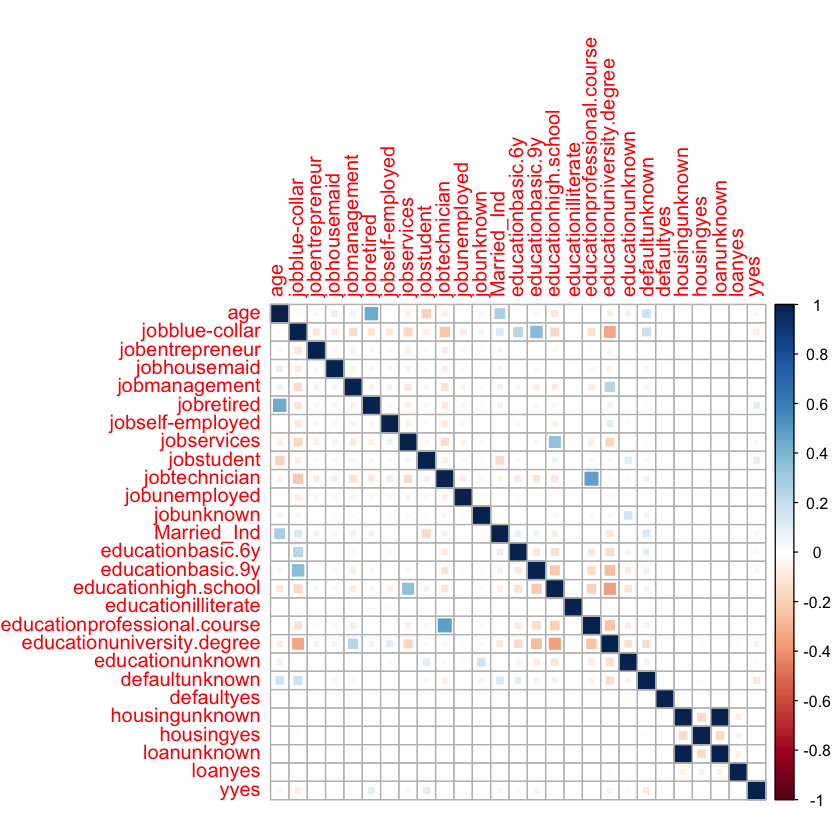

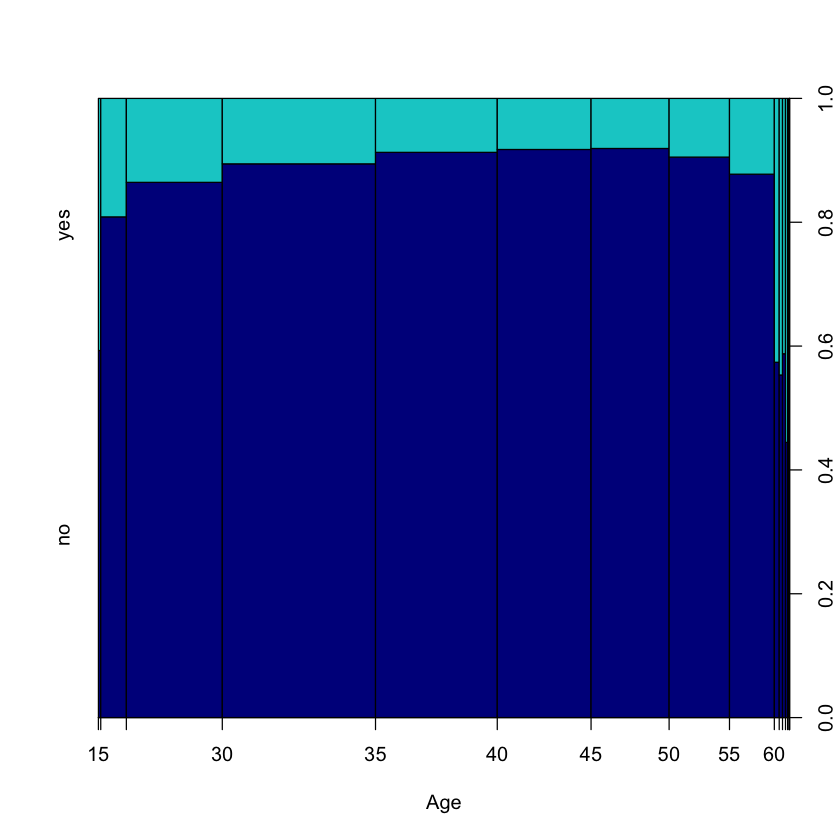

In [24]:
chat = select(data,age,job,Married_Ind,education,default,housing,loan,y)
chat = model.matrix(~.,data=chat)[,-1]
M = cor(chat)
corrplot(M,method = "square") ## draw correlation plot
plot(data$y~data$age,col=c("blue4","cyan3"),xlab = "Age",ylab=" ") # there is a non-linear correlation between age and success

### Analyze the last call
1. The type of contact seems to change in different months (there are some correlation between contact and months)
2. The contact & months have some correlation with y, but as they are also correlated with themselves, it is hard to conclude that if different months affect the outcome or different type of contact affect the outcome
3. Duration is highly correlated with y, but we cannot use it in our model
4. Previous and y also have strong positive correlation
5. Previous outcome can also be a good indicator for the outcome: people with previous success tend to say ”Yes” this time.

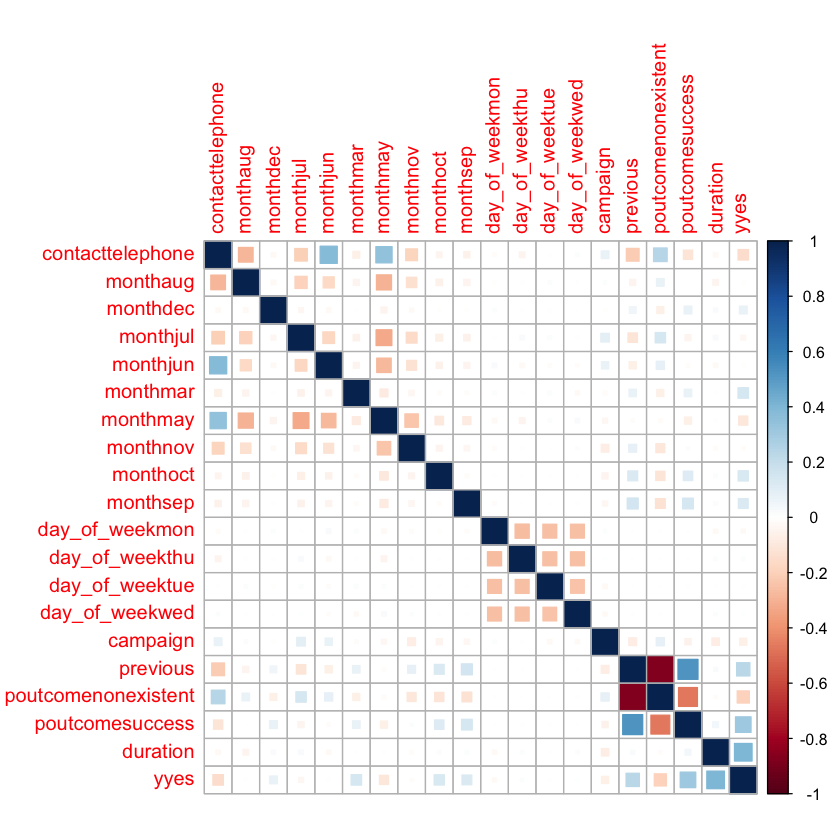

In [26]:
HIS = select(data,contact,month,day_of_week,campaign,previous,poutcome,duration,y)
HIS = model.matrix(~.,data=HIS)[,-1]
M = cor(HIS)
corrplot(M,method = "square")

In [27]:
ch_month = function(x){
  if(x=="apr"){return("2_Arp")}
  else if (x=="aug"){return("6_Aug")}
  else if (x=="dec"){return("92_Dec")}
  else if (x=="jul"){return("5_Jul")}
  else if (x=="jun"){return("4_Jun")}
  else if (x=="mar"){return("1_Mar")}
  else if (x=="may"){return("3_May")}
  else if (x=="nov"){return("91_Nov")}
  else if (x=="oct"){return("8_Oct")}
  else if (x=="sep"){return("7_Sep")}
}

Category,x
1_Mar,0.50549451
2_Arp,0.20478723
3_May,0.06434745
4_Jun,0.10511470
5_Jul,0.09046557
6_Aug,0.10602137
7_Sep,0.44912281
8_Oct,0.43871866
91_Nov,0.10143867
92_Dec,0.48901099


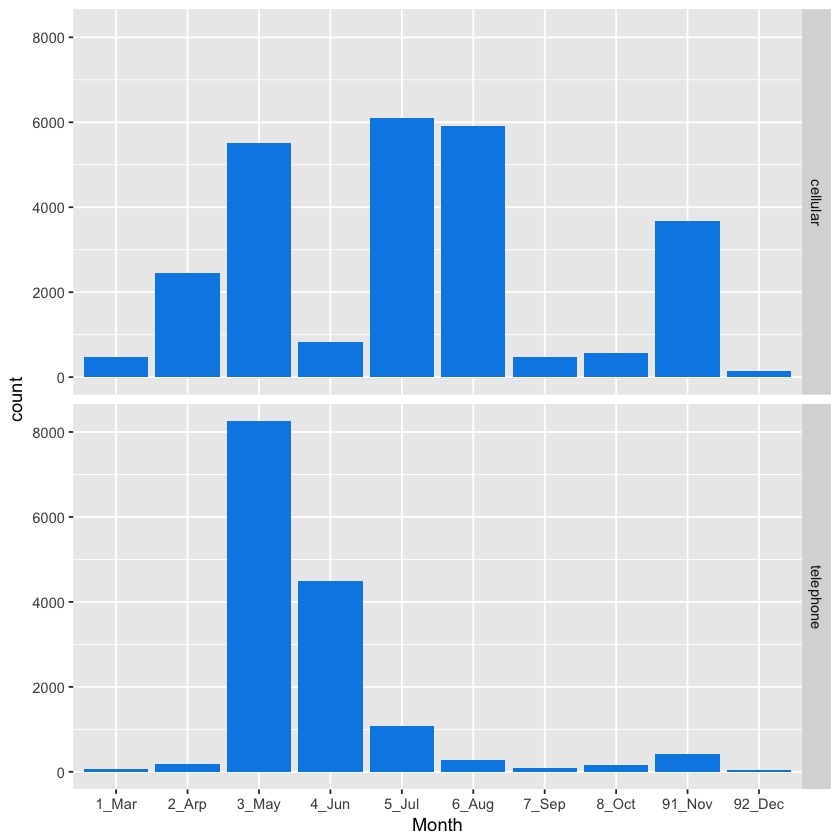

In [30]:
data$month2 = sapply(data$month,ch_month)
data$new_y = ifelse(data$y == "yes",1,0)
prob_in_month = aggregate(data$new_y, by=list(Category=data$month2), FUN=mean)
prob_in_month
tdata = arrange(data,month2)
ggplot(data=tdata,aes(month2))+geom_bar(fill="#008ae6")+facet_grid(contact ~ .)+
  xlab("Month")

#### Notes for the relation between ways of calling and months
1. The company tends to use more telephone in May, June and July, and the performance in these three months are seemed to be not good
2. If we can make sure that there is a huge difference between the three months and other months, we can conclude that the telephone might not be a good way to cold-call

### Analyze the economic indexes
1. Social indexes are really important for predicting the outcome
2. However, those indexes are also highly correlated with each others > be careful when we use them

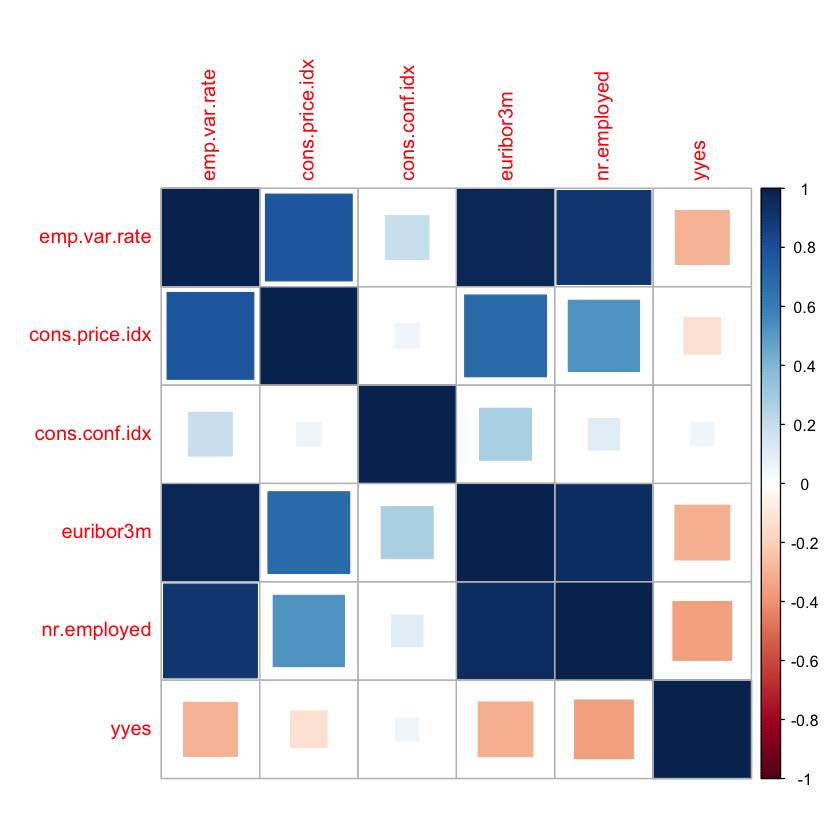

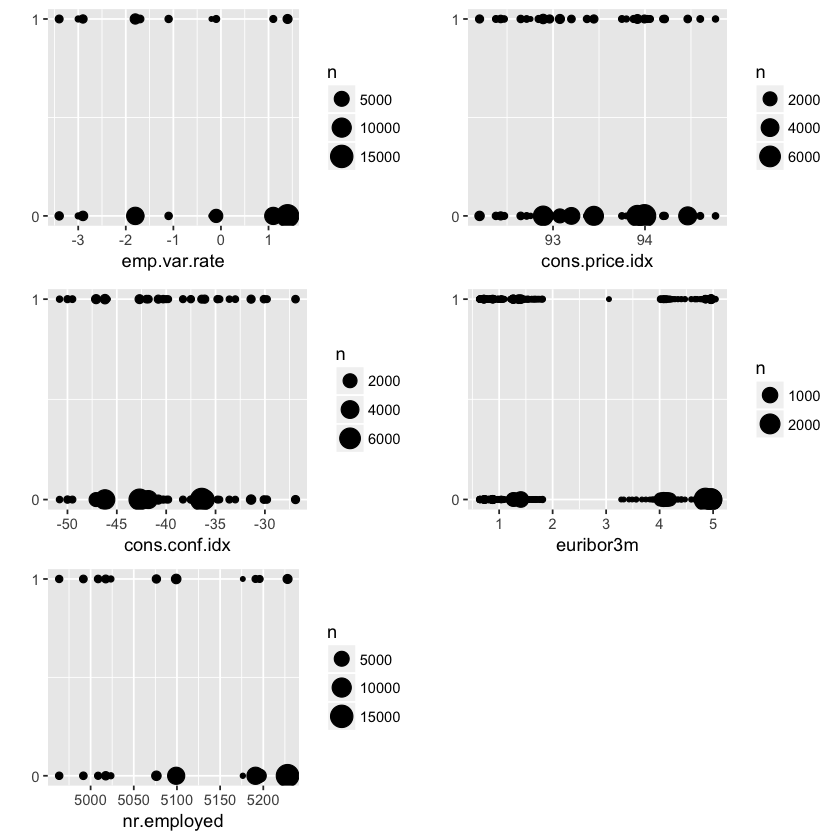

In [33]:
SOC = select(data,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y)
SOC = model.matrix(~.,data=SOC)[,-1]
M = cor(SOC)
corrplot(M,method = "square")
emp.var.rate = ggplot(data,aes(emp.var.rate,new_y))+geom_count()+ylab("")+scale_y_continuous(breaks=c(0,1))
cons.price.idx = ggplot(data,aes(cons.price.idx,new_y))+geom_count()+ylab("")+scale_y_continuous(breaks=c(0,1))
cons.conf.idx = ggplot(data,aes(cons.conf.idx,new_y))+geom_count()+ylab("")+scale_y_continuous(breaks=c(0,1))
euribor3m = ggplot(data,aes(euribor3m,new_y))+geom_count()+ylab("")+scale_y_continuous(breaks=c(0,1))
nr.employed = ggplot(data,aes(nr.employed,new_y))+geom_count()+ylab("")+scale_y_continuous(breaks=c(0,1))
ggarrange(emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ncol=2,nrow=3)

### PCA for the three parts

In [35]:
d1 = data.frame(model.matrix(~age+job+marital+education+default+housing+loan,data=data)[,-1])
pca1 = prcomp(formula = ~.,data=d1,scale=T)
d2 = data.frame(model.matrix(~contact+month+day_of_week+campaign+previous+poutcome,data=data)[,-1])
pca2 = prcomp(formula = ~.,data=d2,scale=T)
d3 = data.frame(model.matrix(~emp.var.rate+cons.price.idx+cons.conf.idx+euribor3m+nr.employed,data=data)[,-1])
pca3 = prcomp(formula = ~.,data=d3,scale=T)
pca_data = data.frame(cbind(pca1$x[,1:10],pca2$x[,1:10],pca3$x[,1:2]))
y = data$y
pca_data = data.frame(cbind(pca_data,y))
pca_data$y = ifelse(pca_data$y == 'yes', 1, 0)

#### Notes for PCA results
1. The purpose for PCA is to find whether there are some correlation between the three types of information
2. We can run principal component analysis on the three types separately
3. We can choose 10 factors for information about character; 10 factors for the information about the last call; 2 factors for the social indexes

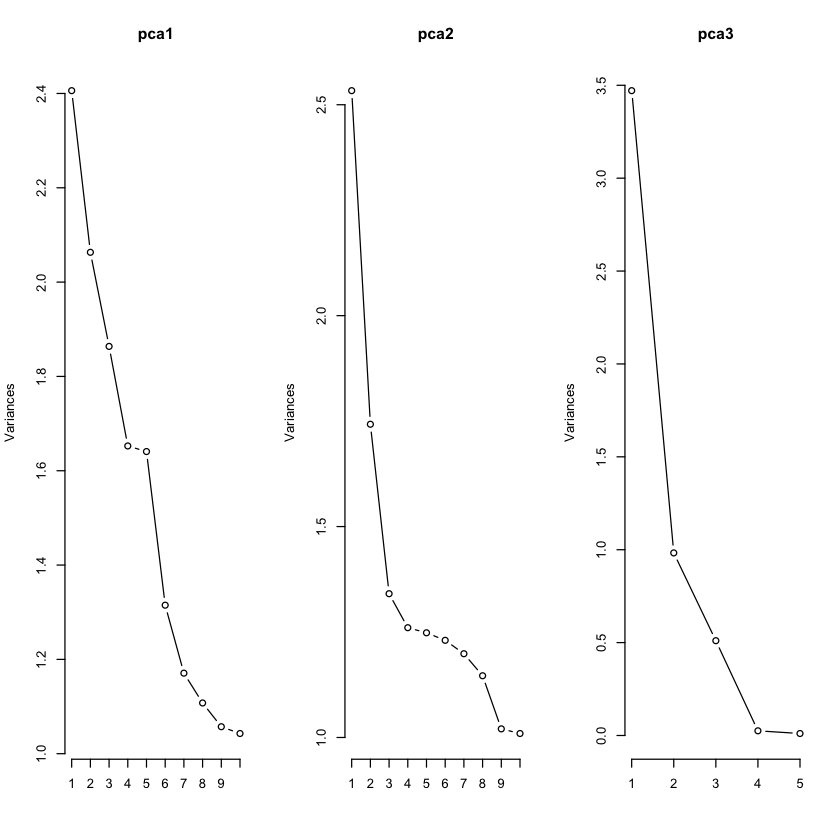

In [36]:
par(mfrow=c(1,3))
plot(pca1,type="line")
plot(pca2,type="line")
plot(pca3,type="line")

There is no strong correlation between the three types of information

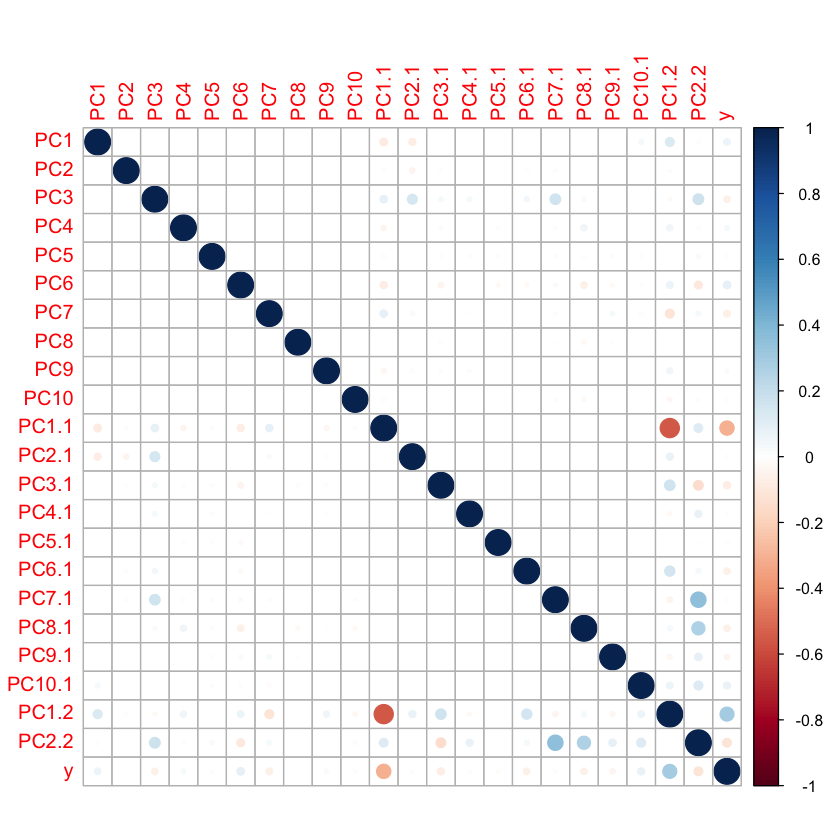

In [37]:
M = cor(pca_data)
corrplot(M)

## Modeling
### Comparing different models 
1. m.lr : logistic regression
2. m.lr.l : logistic regression with interaction using lasso 
3. m.pca : pca model
4. m.lr.tree : classification tree

In [81]:
#library(glmnet)
library(tree)
#source("./code/lasso_aux.R")
#source("./code/deviance_2015.R")
#source("./code/FPR_TPR.R")
#source("./code/PerformanceCurves.R")

In [56]:
# Data process
#drop the first column (id)
BankData = data
#drop marital column (already married index)
BankData = BankData[,-3]
#drop education column (already education index)
BankData = BankData[,-3]
#drop ColdCallInd
BankData = BankData[,-22]
#take off duration
duration = BankData[,9]
BankData = BankData[,-9]
#make y an index
BankData$y = ifelse(BankData$y == "no", 0, 1)
#drop unknown values for housing
BankData = BankData[BankData$housing != "unknown",]
#drop nr.employed
BankData = BankData[,-16]
#create factor variables
BankData$job = as.factor(BankData$job)
BankData$default = as.factor(BankData$default)
BankData$housing = as.factor(BankData$housing)
BankData$loan = as.factor(BankData$loan)
BankData$contact = as.factor(BankData$contact)
BankData$poutcome = as.factor(BankData$poutcome)
BankData$y = as.factor(BankData$y)
BankData$Married_Ind = as.factor(BankData$Married_Ind)
BankData$University_Ind = as.factor(BankData$University_Ind)
BankData$Professional_Ind = as.factor(BankData$Professional_Ind)
BankData$No_Higher_Edu_Ind = as.factor(BankData$No_Higher_Edu_Ind)
BankData$month = as.factor(BankData$month)
BankData$day_of_week = as.factor(BankData$day_of_week)

In [67]:
newMx = model.matrix(y ~ .^2, data=BankData)[,-1]
newMy = BankData$y

In [68]:
set.seed(123)
subset = sample(nrow(newMx), 10000)
Mx = newMx[subset,]
My<- BankData$y[subset] == 1

In [69]:
## Use the theory to select the optimal value of lambda
num.features <- ncol(Mx)
num.n <- nrow(Mx)
num.churn <- sum(My)
w <- (num.churn/num.n)*(1-(num.churn/num.n))
lambda.theory <- sqrt(w*log(num.features/0.05)/num.n)

In [74]:
## and finally let's run lasso for the value of lambda we just found
lassoTheory <- glmnet(Mx,My, family="binomial",lambda = lambda.theory)
summary(lassoTheory)
support(lassoTheory$beta)

           Length Class     Mode     
a0           1    -none-    numeric  
beta       889    dgCMatrix S4       
df           1    -none-    numeric  
dim          2    -none-    numeric  
lambda       1    -none-    numeric  
dev.ratio    1    -none-    numeric  
nulldev      1    -none-    numeric  
npasses      1    -none-    numeric  
jerr         1    -none-    numeric  
offset       1    -none-    logical  
classnames   2    -none-    character
call         5    -none-    call     
nobs         1    -none-    numeric  

[1]  36  79 150 306 327 370 436 478 488 655 688 691 708 711 728 736 739 742 772
[20] 837 846 849 855 859 866 875

In [75]:
## these are the variables selected by the regularization via lasso. Let's apply them to our dataset

features.min <- support(lassoTheory$beta)
length(features.min)
data.min <- data.frame(newMx[,features.min],newMy)

[1] 26

In [82]:
## 10-fold cross validation

PerformanceMeasure <- function(actual, prediction, threshold=.3) {
  R2(y=actual, pred=prediction, family="binomial")
}

n <- nrow(BankData)
nfold <- 10
OOS <- data.frame(m.lr=rep(NA,nfold), m.lr.pl=rep(NA,nfold), m.pca=rep(NA, nfold), m.tree=rep(NA,nfold), m.average=rep(NA,nfold)) 
foldid <- rep(1:nfold,each=ceiling(n/nfold))[sample(1:n)]

for(k in 1:nfold){ 
  train <- which(foldid!=k) # train on all but fold `k'
  
  ### Logistic regression
  m.lr <-glm(y~., data=BankData, subset=train,family="binomial")
  pred.lr <- predict(m.lr, newdata=BankData[-train,], type="response")
  OOS$m.lr[k] <- PerformanceMeasure(actual=newMy[-train], pred=pred.lr)
  
  
  ### the Post Lasso Estimates
  m.lr.pl <- glm(newMy~., data=data.min, subset=train, family="binomial")
  pred.lr.pl <- predict(m.lr.pl, newdata=data.min[-train,], type="response")
  OOS$m.lr.pl[k] <- PerformanceMeasure(actual=newMy[-train], prediction=pred.lr.pl)
  
  
  ### PCA estimates
  m.pca = glm(y ~ ., data = pca_data, subset=train, family = "binomial")
  pred.pca = predict(m.pca, newdata = pca_data[-train,], type="response")
  OOS$m.pca[k] <- PerformanceMeasure(actual=pca_data[-train,"y"], prediction=pred.pca)

  
  ### the classification tree
  m.tree <- tree(y~ ., data=BankData, subset=train) 
  pred.tree <- predict(m.tree, newdata=BankData[-train,], type="vector")
  pred.tree <- pred.tree[,2]
  OOS$m.tree[k] <- PerformanceMeasure(actual=newMy[-train], prediction=pred.tree)
  
  pred.m.average <- rowMeans(cbind(pred.tree, pred.lr.pl, pred.lr, pred.lr))
  OOS$m.average[k] <- PerformanceMeasure(actual=newMy[-train], prediction=pred.m.average)
  
  print(paste("Iteration",k,"of",nfold,"completed"))
  
}

[1] "Iteration 1 of 10 completed"
[1] "Iteration 2 of 10 completed"
[1] "Iteration 3 of 10 completed"
[1] "Iteration 4 of 10 completed"
[1] "Iteration 5 of 10 completed"
[1] "Iteration 6 of 10 completed"
[1] "Iteration 7 of 10 completed"
[1] "Iteration 8 of 10 completed"
[1] "Iteration 9 of 10 completed"
[1] "Iteration 10 of 10 completed"


The PCA model seems to be the best model, based on the R-squared

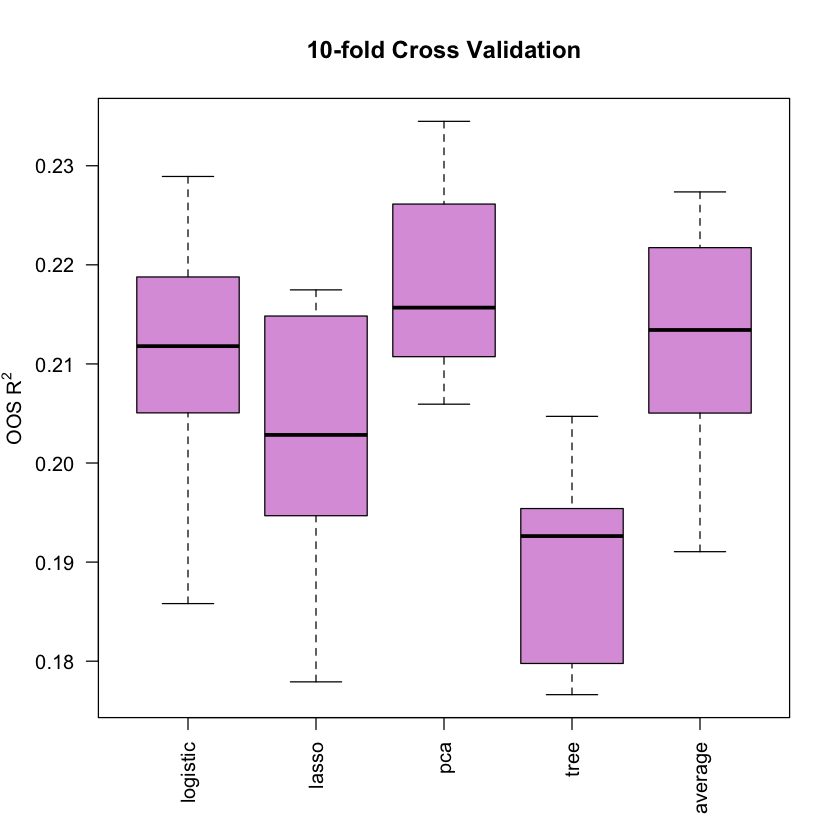

In [83]:
## Let's plot a boxplot
names(OOS)[1] <-"logistic"
names(OOS)[2] <-"lasso"
names(OOS)[3] <-"pca"
names(OOS)[4] <-"tree"
names(OOS)[5] <-"average"
boxplot(OOS, col="plum", las = 2, ylab=expression(paste("OOS ",R^2)), xlab="", main="10-fold Cross Validation")

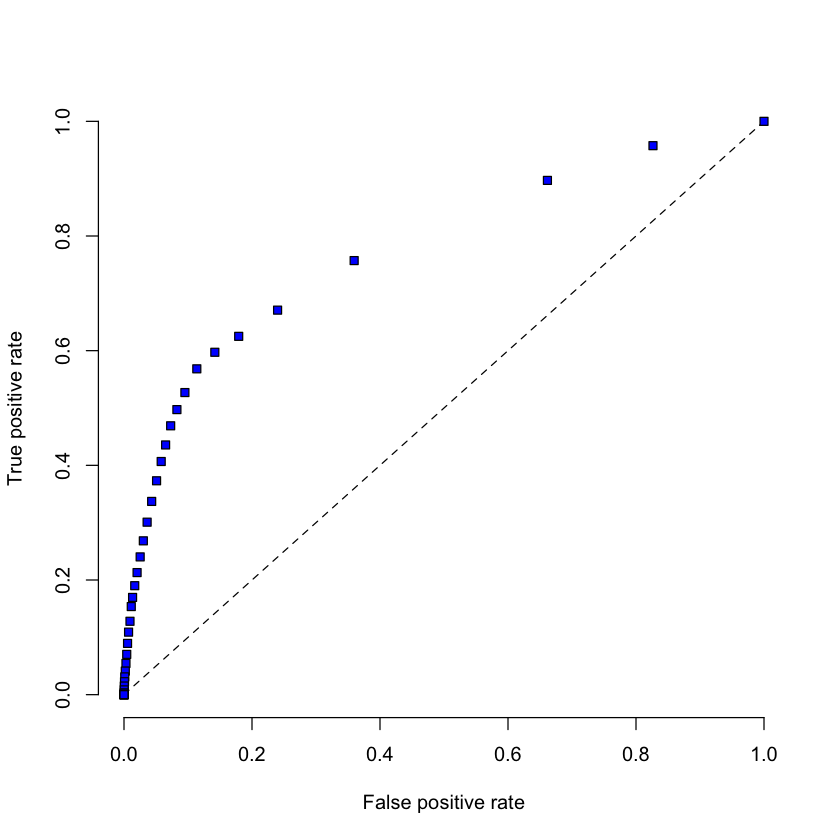

In [85]:
### Lets plot FPR and TPR for the PCA model for different tresholds
plot( c( 0, 1 ), c(0, 1), type="n", xlim=c(0,1), ylim=c(0,1), bty="n", xlab = "False positive rate", ylab="True positive rate")
lines(c(0,1),c(0,1), lty=2)
m.pca = glm(y ~ ., data = pca_data, family = "binomial")
for( val in seq(from=0,to=1,by=0.025)){
  values <- FPR_TPR( predict(m.pca, type="response") >= val, pca_data[,"y"])
  points( values[1] , values[2], pch = 22, bg="blue" )
}